In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from bs4 import BeautifulSoup
import time
import requests
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
import praw
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC

In [36]:
df=pd.read_csv('./large_train_sample.csv')

In [24]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


/Users/jennyjames/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/jennyjames/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/jennyjames/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/jennyjames/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


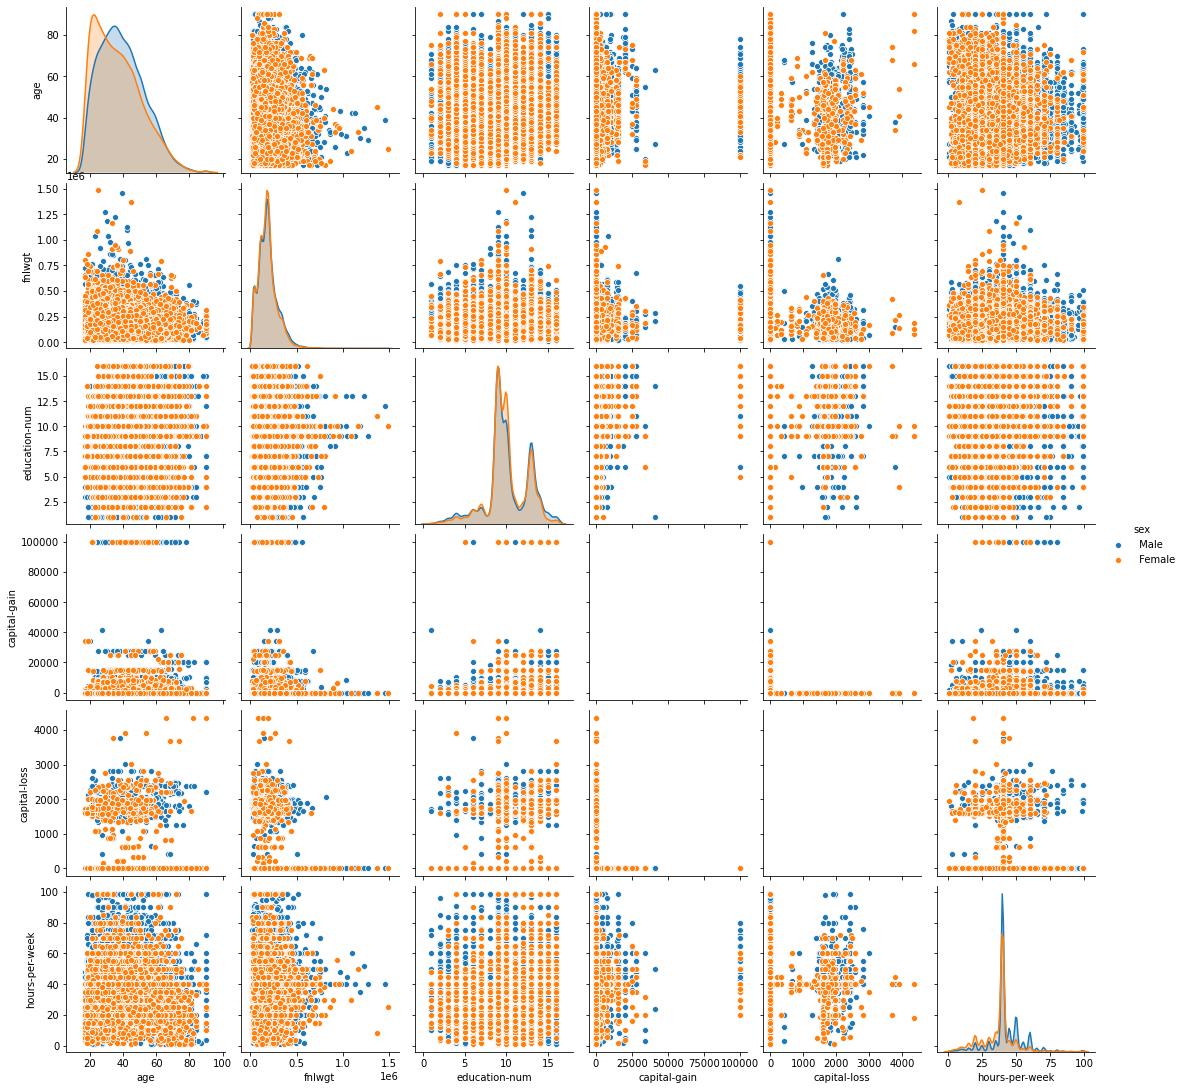

In [5]:
sns.pairplot(df, hue='sex')

In [7]:
def display_corr_heatmap(df,target,title_prefix="",save=False):
    '''EDA helper function. Takes dataframe and
    target column to compare correlation values 
    against. Displays heatmap with option to save
    as file and augment figure title.'''
    corr = df.corr()
    plt.figure(figsize=(16,9))
    corr_hmap = sns.heatmap(corr[[target]].sort_values(by=target,
                                                       ascending=False),
                            vmin=-1,
                            vmax=1,
                            annot= True,
                            cmap='icefire');
    title_name = title_prefix+'Features Correlation with '+target
    plt.title(title_name,size=20)
    #if save:
        #fname = "".join(title_name.split())
        #plt.savefig(fname+".png")

In [ ]:
display_corr_heatmap(df)

In [15]:
df['wage'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: wage, Length: 32561, dtype: int64>

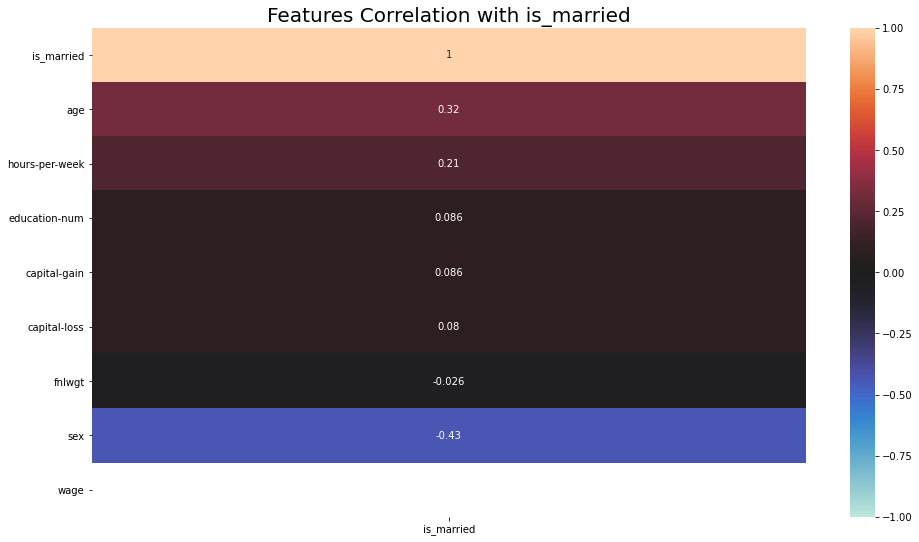

In [60]:
df["is_married"] = df["marital-status"].apply(lambda a: int(a==' Married-civ-spouse'))
df['wage'] = df['wage'].apply(lambda a: int(a==' >50K'))
display_corr_heatmap(df, "is_married", save=True)

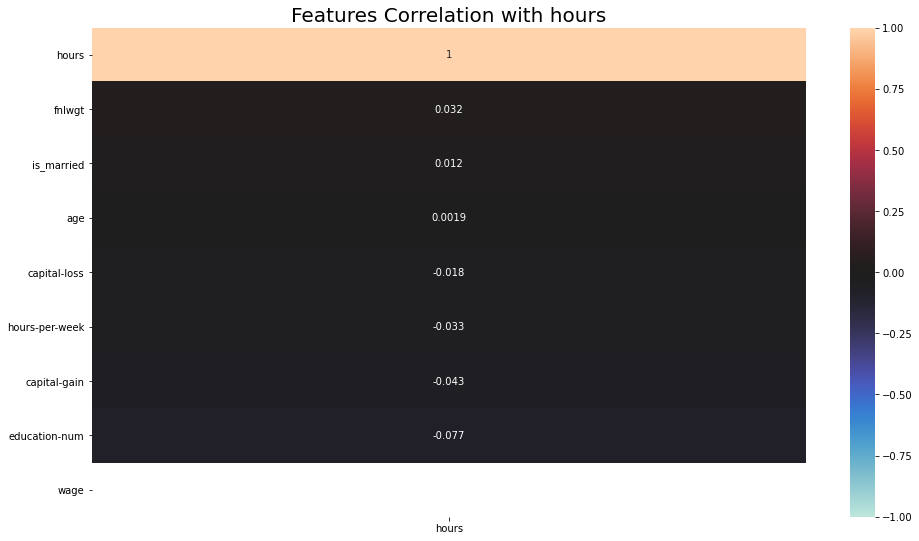

In [14]:
df["hours"] = df["hours-per-week"].apply(lambda a: int(a==40))
df['wage'] = df['wage'].apply(lambda a: int(a==' >50K'))
df_conts = df[["age","wage","fnlwgt","capital-gain","capital-loss","marital-status","education-num","hours"]]
display_corr_heatmap(df, "hours", save=True)

In [37]:
df=pd.get_dummies(df,columns=['wage'])

In [44]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,wage,sex
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,0,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,0,0,40,United-States,0,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,0,0,16,Jamaica,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,0,0,45,United-States,1,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,14084,0,50,United-States,1,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,5178,0,40,United-States,1,0


In [39]:
df['wage']=df['wage_ <=50K']*0+df['wage_ >50K']

In [41]:
df=pd.get_dummies(df,columns=['sex'])

In [42]:
df['sex']=df['sex_ Female']+df['sex_ Male']*0

In [43]:
df=df.drop(columns=['wage_ <=50K','wage_ >50K','sex_ Female','sex_ Male'])

In [54]:
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','wage','sex']

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'native']

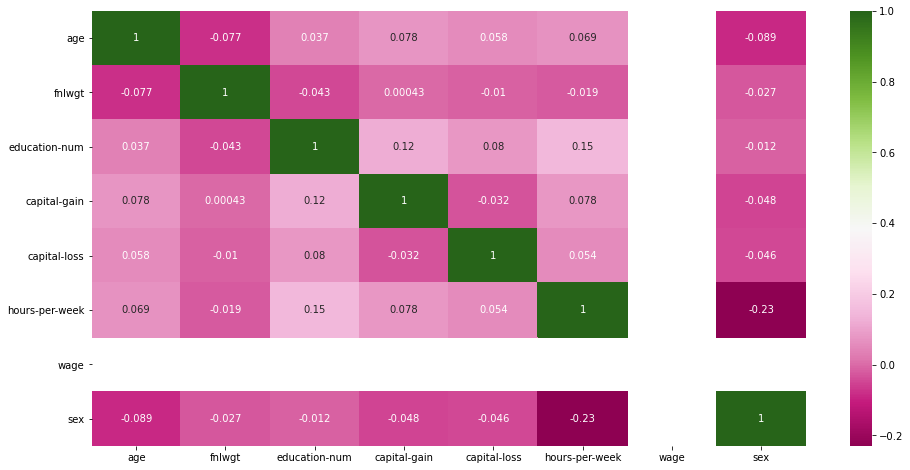

In [75]:
features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','wage','sex']
plt.figure(figsize=(16,8))
sns.heatmap(df[features].corr(),annot=True, cmap = "PiYG");


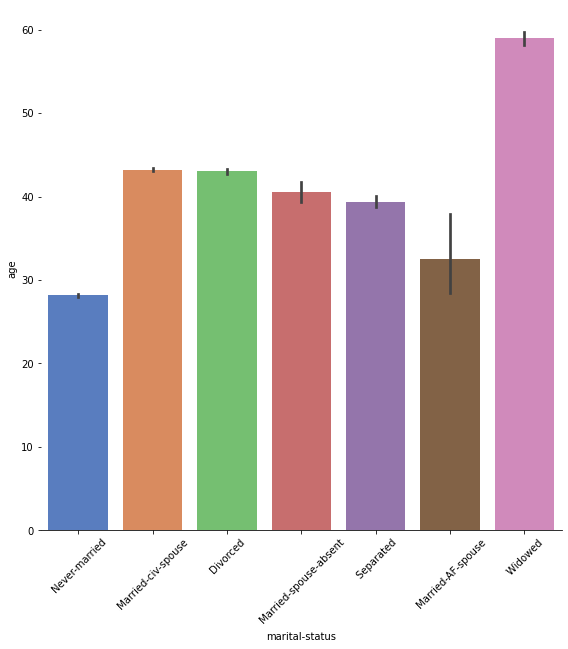

In [86]:
g = sns.factorplot(x="marital-status",y="age",data=df,kind="bar", size=8,
palette = "muted")
plt.xticks(rotation=45)
g.despine(left=True);

In [61]:
df['is_married-ed-num']=df['is_married']*df['education-num']

In [68]:
df['is_married-hrs']=df['is_married']*df['hours-per-week']

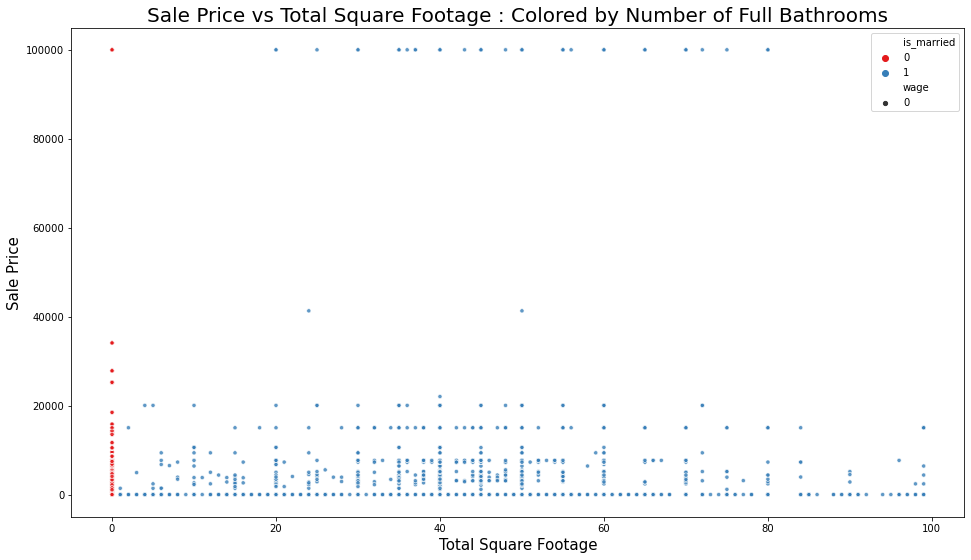

In [69]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='is_married-hrs', y='capital-gain',hue='is_married',alpha=.8,size='wage',
                #sizes=(15, 500),
                x_bins=200,
                    data=df,
                    #scale='width', 
            palette='Set1')
plt.ylabel('Sale Price',size=15)
plt.xlabel('Total Square Footage',size=15)
plt.title('Sale Price vs Total Square Footage : Colored by Number of Full Bathrooms',size=20);

In [87]:
dfclean=pd.read_csv('./train_CLEAN.csv')

In [88]:
dfclean.head()

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,77516,Bachelors,13,Male,2174,0,40,United-States,0,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,Bachelors,13,Male,0,0,13,United-States,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,HS-grad,9,Male,0,0,40,United-States,0,...,0,1,0,0,0,0,0,0,0,0
3,53,234721,11th,7,Male,0,0,40,United-States,0,...,0,1,0,0,0,0,0,0,0,0
4,28,338409,Bachelors,13,Female,0,0,40,Cuba,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
params_lr = {
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
}
gs_lr = GridSearchCV(
    estimator = LogisticRegression(solver='liblinear', verbose=2)
)
gs_lr.fit(X_train, y_train)

In [ ]:
params_dt = {
    'max_depth' : [None],
    'min_samples_split' : [1, 2, 3],
    'min_samples_leaf' : [1, 2, 3],
    'ccp_alpha' : np.linspace(0,5,50),
}
gs_dt = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = params_dt,
    cv = 5,
    n_jobs = -1,
    verbose = 2,    
)
gs_dt.fit(X_train, y_train)

In [ ]:
params_rf = {
    'n_estimators' : [1, 10, 100],
    'max_depth' : [None],
    'min_samples_split' : [1, 2, 3],
    'min_samples_leaf' : [1, 2, 3],
    'ccp_alpha' : [5, 50, 500],
}
gs_rf = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = params_rf,
    cv = 5,
    n_jobs = -1,
    verbose = 2,    
)
gs_rf.fit(X_train, y_train)

In [ ]:
params_br = {
    'n_estimators' : [1, 10, 100, 1000]
}
gs_br = GridSearchCV(
    estimator = BaggingClassifier(),
    param_grid = params_br,
    cv = 5,
    n_jobs = -1,
    verbose = 2,    
)
gs_br.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(10,6))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = [0.844, 0.899, 0.888, 0.936, 0.855, 0.851]
bars2 = [0.849, 0.841, 0.864, 0.841, 0.847, 0.853]
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
# Make the plot
plt.bar(r1, bars1, color='#008080', width=barWidth, edgecolor='white', label='Train')
plt.bar(r2, bars2, color='#FFBF65', width=barWidth, edgecolor='white', label='Test')
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Logistic Regression', 'Decision Tree', 'Random Forest',
                                                       'Bagged Trees', 'KNN', 'SVC'])
# Create legend & Show graphic
plt.legend()
plt.show()
plt.savefig('./data/models.png', bbox_inches="tight");

In [ ]:
plt.figure(figsize=(6, 6))
final[['wage', 'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 
       'is_usa', 'is_top7_occ','is_married', 'is_male', 'is_high_ed']].corr()[['wage']].sort_values(by='wage', ascending=True).plot(kind='barh', figsize=(16,12), color='white')
plt.title('Feature Influence', size=30, c='white')
plt.xlabel('% influence', size=25,  c='white')
plt.xticks(c='white', size=20)
plt.yticks(c='white', size=20)
# plt.xaxis.label.set_color('white')
plt.ylabel('Features', c='white')
plt.savefig('./images/top_variables.png', bbox_inches="tight", transparent=True);

In [ ]:
SVC()